# DSTY

In [1]:
# Import libraries
import pandas as pd
# import numpy as np
# from matplotlib import pyplot

In [11]:
df_Data = pd.read_csv("./census_income_learn_Final_EDA.csv")
# Due to shortage of time all the data massaging and manipulation was done using sql server after importing data into the 
    # sql server. Then a csv file was created from the resultant consolidation. I could have used pandas and df
# The original data had the following set of individual data sets:
#     1. customer.txt - 25000 Records
#     2. customer_email_campaign_agg.txt ~22000
#     3. customer_subscription_status.txt
#     4. item.txt -- This data was ignored since this is just a list of items offered at Dillards. There's (seems to be) no connection with the model for this.
#     5. store_location.txt -- Locations of Dillard's stores
#     6. transaction_detail.txt -- Line item transactions of each customer. One-to-many relationship
# Observations:
#     1. There was a big mismatch of customer id's between customer_email_campaign_agg.txt and the rest of the data sets.
#     2. Out 25k records in Customer and 22k records in customer_email_campaign_agg.txt only 1003 records mathc. According to
#         Ambex this was a sampling error so I decided to work with 1003 records in order to have a sane model.
#     3. I realize its a tiny subset of the overall data but I figured since it was a sampling error otherwise I'd have more 
#         matching data.
#     4. This may not produce the best accuracy score but at least it would allow me to create a reliable model.

In [12]:
df_Data.head()
# Feature Engineering:
#     1. Data from the transactional details dataset was aggregated(summed) into a single line for each customer.
#     All times were aggregated into sum of the count of inidividual items. This was to see how many varieties of items are 
#         customers buying.
#     NetSpend amount was summed up to get a nice one-to-one matching per customer
#     2. There was an interesting observation for some customers regarding the locations. Some customer used multiple locations
#     spread across several states. It's assumed that these might be commercial customers with offices in several locations or
#     traveling consultants who probably have a Dillard's card issued by their employers.
#     I added up the count of Distinct locations complimented by distinct cities and distinct state counts to give the locations
#     a more meaningful explanations.

,Age,WrkrCls,IndCd,OcuID,edu,wage_hr,EduEnrlLstWk,MarryStat,IndCdMjr,OcuCdMjr,...,CntryDad,CntryMom,CntrySelf,Citizen,BusOrEmp,QstnrVet,VetBengts,WksWrkd,Year,Inc
0,55,Private,44,12,High school graduate,0,Not in universe,Married-civilian spouse present,Social services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,46,94,0
1,40,Private,2,44,11th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,32,94,0
2,42,Private,40,44,High school graduate,0,Not in universe,Divorced,Entertainment,Farming forestry and fishing,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,28,94,0
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,50,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,El-Salvador,El-Salvador,El-Salvador,Foreign born- Not a citizen of U S,0,Not in universe,2,0,94,0


Feautre Engineering to further compact the data:
    1. Checked both datasets for null values. Created duplicate datasets but after taking out the null values. This was done to first identify which columns are important for modeling. Once the columns are identified then the null values will be dealt with accordingly.
    
    2. The Y (predict) 'Income' column was converted to integer (0= '-50000', 1 = ' 50000+) in order to have a  better compatible column for classification
    
    3. Column names were changed to be made more meaningful since the short codes provided dont dleiver the meaning and detailed columns are too lengthy. A metadata table laying out connections to column names is created so when working in real world environment then column names can be connected back.
    
    4. Identify non parametric features/columns that will be converted to numerics using label_encoder or get_dummies
    [Age] -- Int
      ,[WrkrCls] --LabelEncoder
      ,[IndCd]  -- Int
      ,[OcuID] -- Int
      ,[edu] LabelEncoder
      ,[wage_hr] -- Int
      ,[EduEnrlLstWk] LabelEncoder
      ,[MarryStat] LabelEncoder
      ,[IndCdMjr] LabelEncoder
      ,[OcuCdMjr] LabelEncoder
      ,[Race] LabelEncoder
      ,[HispOrgn] LabelEncoder
      ,[Sex] LabelEncoder
      ,[LabrUnn] LabelEncoder
      ,[UnempResn] LabelEncoder
      ,[EmpFullPrt] LabelEncoder
      ,[CapGain] -- Int
      ,[CanLos] -- Int
      ,[StkDiv] -- Int
      ,[FilingStat] LabelEncoder
      ,[ResPrvRgn] LabelEncoder
      ,[ResPrvStat] LabelEncoder
      ,[HshldFamStat] LabelEncoder
      ,[HshldSum] LabelEncoder
      ,[InstWgt] -- Float
      ,[MigCdMSA] LabelEncoder
      ,[MigCdRgn] LabelEncoder
      ,[MigCdRgnMov] LabelEncoder
      ,[SameHouse] LabelEncoder
      ,[MigCdSbeltRes] LabelEncoder
      ,[NumWrkng] -- Int
      ,[UnderAge] LabelEncoder
      ,[CntryDad] LabelEncoder
      ,[CntryMom] LabelEncoder
      ,[CntrySelf] LabelEncoder
      ,[Citizen] LabelEncoder
      ,[BusOrEmp] -- Int
      ,[QstnrVet] LabelEncoder
      ,[VetBengts] -- Int
      ,[WksWrkd] -- Int
      ,[Year] -- Int
      ,[Inc] -- Int
      
    5. All the missing data is for year 95. The following columns below have huge gaps in data. If the Records (ie Rows) of the missing data are deleted then Entire data subset of Year 95 is out. Upon inspecting the effect of the columns below on Income its determined that the effect is minimal and therefore these columns are taken out to preserve the data for year 95 
        [ResPrvStat] --330
        [MigCdMSA]) --49946
        [MigCdRgn]) --49946
        [MigCdRgnMov]) --49946
        [MigCdSbeltRes] --49946
        [CntryDad] --3429
        [CntryMom] --3072
        [CntrySelf] --1764
     
    6. Columns Capital Gains, Capital Losses, Stock Dividends have extremely low amount of Data and that makes them not as effective for Income determination. These columns are also being thrown out.
        
    3. Identify multicolinearity-----------
    
    - Field 'total_email_click_count' seems redundant so it will be omitted.
    - Field total_email_open_count will be divided by total_email_sent_count and rounded to generate an integer to create a 
    new field called 'total_email_read_Percent'. Now the model has workable data.
    3. Fields 'product_email_sent_count', 'product_email_open_count', 'product_email_click_count' will be dealt with the same
    way as #2 above
    4. Fields 'sale_email_sent_count', 'sale_email_open_count', 'sale_email_click_count' will also be dealt with the same
    was as #2, #3 above.
    5. unsubscribed_yn field will be changed to reflect the same meaning but in an opposite way by changing the name to
    Subsribed so that Y = 1 and N = 0 when we do get_dummies.
    6. 'last_email_open_date', 'last_email_click_date' are deemed unnecessary (based on common sense) for modeling purposes.
    7. Upon closer look it is pretty obvious that column 'total_email_sent_count' = product_emails + sale_emails + other_emails
    Therefore to avoid multicolinearity, the columns related to product_emails and sales_emails will be removed and just the
    total_emails column will be used as its all inclusive.
    6. Assumptions:
        i. Null fields in product_emails_sent and sale_emails_sent were set to 0 since their corresponding fields were also 0
        ii. The null fields in NetSpend column has been set to 0. It is assumed that if the total number transactions are 
        ZERO then the customer didn't have any sales that would generate sales data.

In [20]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_Data_LE = df_Data.apply(le.fit_transform)
# df_Data.apply(LabelEncoder().fit_transform)

In [21]:
df_Data_LE.head()

,Age,WrkrCls,IndCd,OcuID,edu,wage_hr,EduEnrlLstWk,MarryStat,IndCdMjr,OcuCdMjr,...,CntryDad,CntryMom,CntrySelf,Citizen,BusOrEmp,QstnrVet,VetBengts,WksWrkd,Year,Inc
0,55,4,44,12,12,0,2,2,20,10,...,37,37,37,4,0,1,2,46,0,0
1,40,4,2,44,1,0,2,2,0,3,...,37,37,37,4,0,1,2,32,0,0
2,42,4,40,44,12,0,2,0,6,3,...,37,37,37,4,0,1,2,28,0,0
3,10,3,0,0,10,0,2,4,14,6,...,37,37,37,4,0,1,0,0,0,0
4,50,3,0,0,12,0,2,2,14,6,...,7,7,7,0,0,1,2,0,0,0


In [23]:
import seaborn as sns
sns.set(font_scale=2, style="ticks", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

Percentage of Income Less than 50K:  94.24051298223483
Percentage of Income greater than 50K  5.759487017765164
0    89651
1     5479
Name: Inc, dtype: int64
There seems to be a class imbalance


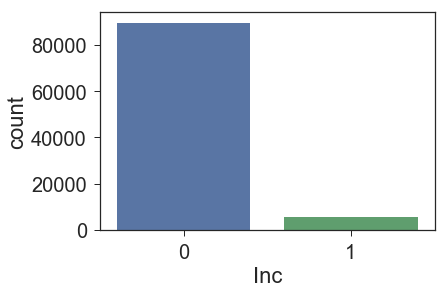

In [25]:
# Checking the imbalance of the data
df_Data_LE['Inc'].value_counts()
count_no_sub = len(df_Data_LE[df_Data_LE['Inc']==0])
count_sub = len(df_Data_LE[df_Data_LE['Inc']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of Income Less than 50K: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of Income greater than 50K ", pct_of_sub*100)
print(df_Data_LE['Inc'].value_counts())
sns.countplot(x= 'Inc', data=df_Data_LE) #, palette = 'his')
# plt.show()
# plt.savefig('Counts_Plot')

if (abs(count_no_sub - count_sub)) >20:
    print("There seems to be a class imbalance")
else:
    print("The classes are balanced good enough to model without oversampling.")

Text(0,0.5,'Income')

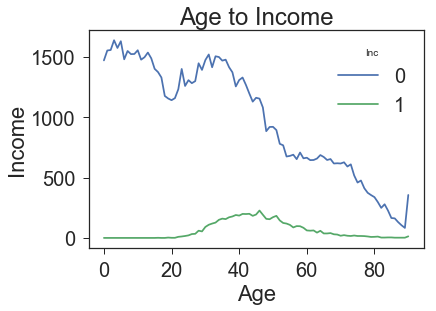

In [27]:
%matplotlib inline
pd.crosstab(df_Data_LE.Age,df_Data_LE.Inc).plot()
# pd.crosstab(df_FinalData.NetSpend,df_FinalData.Subscribed).plot(kind='bar')
plt.title('Age to Income')
plt.xlabel('Age')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

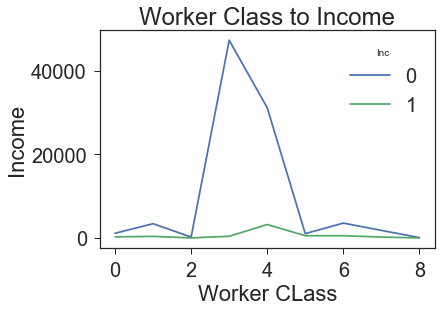

In [29]:
pd.crosstab(df_Data_LE.WrkrCls,df_Data_LE.Inc).plot()
plt.title('Worker Class to Income')
plt.xlabel('Worker CLass')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

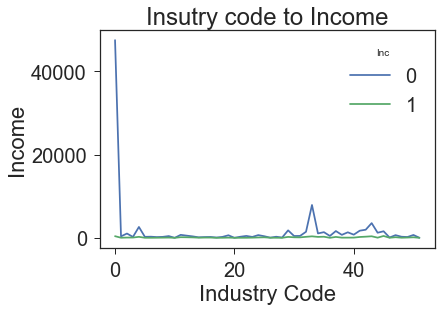

In [31]:
pd.crosstab(df_Data_LE.IndCd,df_Data_LE.Inc).plot()
plt.title('Insutry code to Income')
plt.xlabel('Industry Code')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

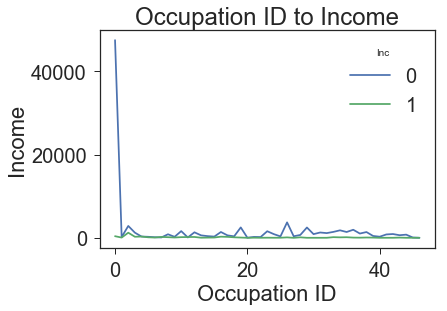

In [32]:
pd.crosstab(df_Data_LE.OcuID,df_Data_LE.Inc).plot()
plt.title('Occupation ID to Income')
plt.xlabel('Occupation ID')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

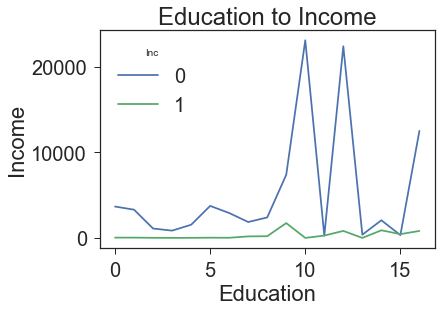

In [33]:
pd.crosstab(df_Data_LE.edu,df_Data_LE.Inc).plot()
plt.title('Education to Income')
plt.xlabel('Education')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

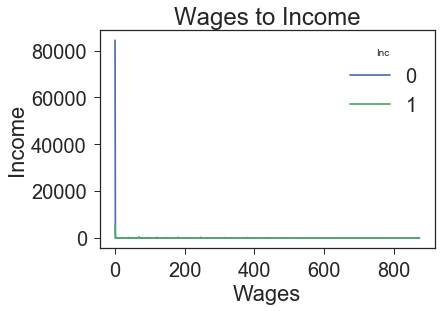

In [35]:
pd.crosstab(df_Data_LE.wage_hr,df_Data_LE.Inc).plot()
plt.title('Wages to Income')
plt.xlabel('Wages')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

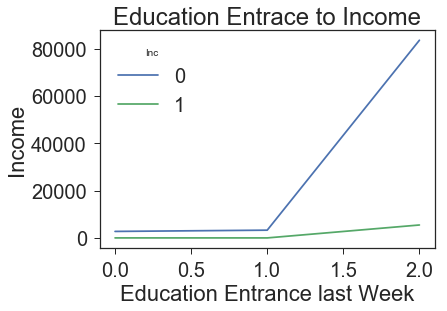

In [37]:
pd.crosstab(df_Data_LE.EduEnrlLstWk,df_Data_LE.Inc).plot()
plt.title('Education Entrance to Income')
plt.xlabel('Education Entrance last Week')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

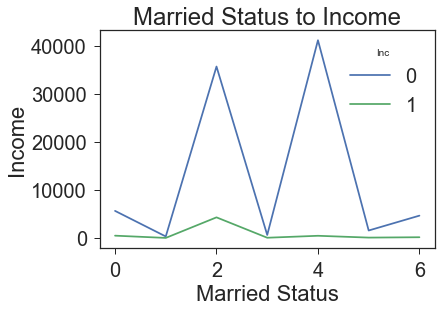

In [79]:
pd.crosstab(df_Data_LE.MarryStat,df_Data_LE.Inc).plot()
plt.title('Married Status to Income')
plt.xlabel('Married Status')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

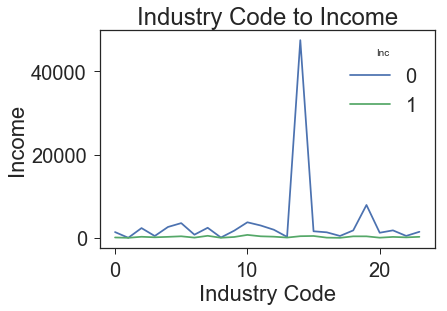

In [80]:
pd.crosstab(df_Data_LE.IndCdMjr,df_Data_LE.Inc).plot()
plt.title('Industry Code to Income')
plt.xlabel('Industry Code')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

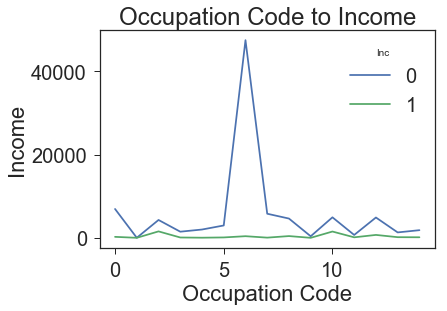

In [81]:
pd.crosstab(df_Data_LE.OcuCdMjr,df_Data_LE.Inc).plot()
plt.title('Occupation Code to Income')
plt.xlabel('Occupation Code')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

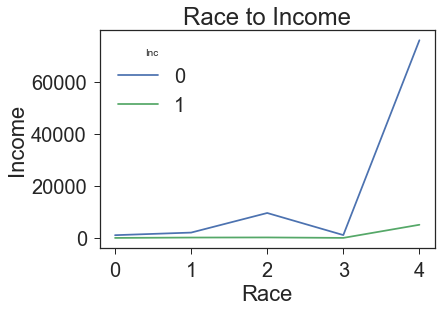

In [82]:
pd.crosstab(df_Data_LE.Race,df_Data_LE.Inc).plot()
plt.title('Race to Income')
plt.xlabel('Race')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

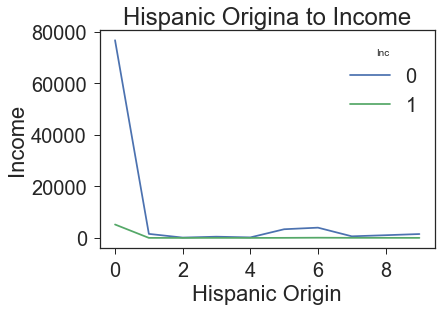

In [83]:
pd.crosstab(df_Data_LE.HispOrgn,df_Data_LE.Inc).plot()
plt.title('Hispanic Origina to Income')
plt.xlabel('Hispanic Origin')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

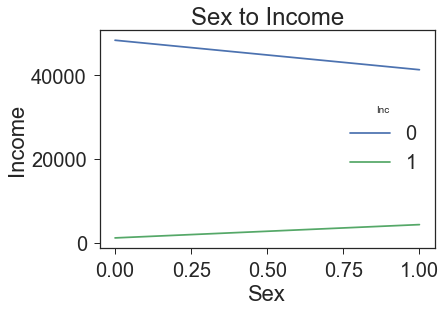

In [84]:
pd.crosstab(df_Data_LE.Sex,df_Data_LE.Inc).plot()
plt.title('Sex to Income')
plt.xlabel('Sex')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

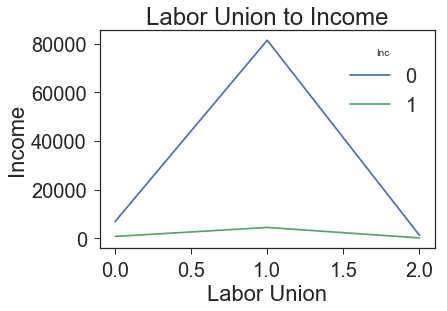

In [85]:
pd.crosstab(df_Data_LE.LabrUnn,df_Data_LE.Inc).plot()
plt.title('Labor Union to Income')
plt.xlabel('Labor Union')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

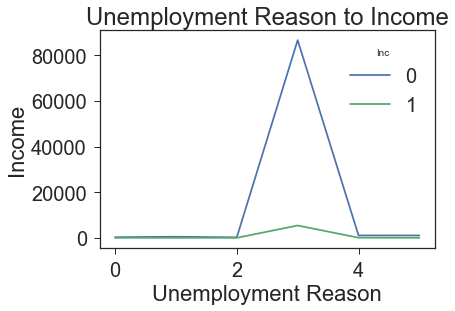

In [86]:
pd.crosstab(df_Data_LE.UnempResn,df_Data_LE.Inc).plot()
plt.title('Unemployment Reason to Income')
plt.xlabel('Unemployment Reason')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

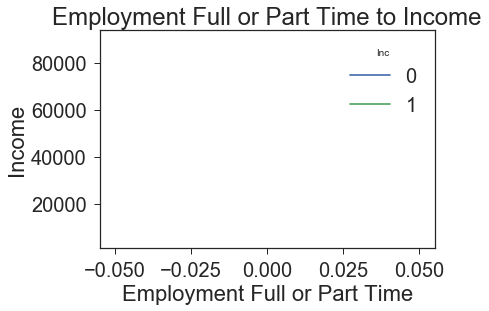

In [87]:
pd.crosstab(df_Data_LE.EmpFullPrt,df_Data_LE.Inc).plot()
plt.title('Employment Full or Part Time to Income')
plt.xlabel('Employment Full or Part Time')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

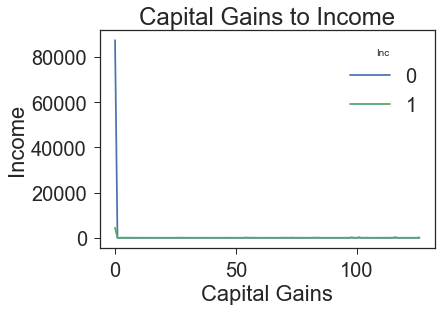

In [88]:
pd.crosstab(df_Data_LE.CapGain,df_Data_LE.Inc).plot()
plt.title('Capital Gains to Income')
plt.xlabel('Capital Gains')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

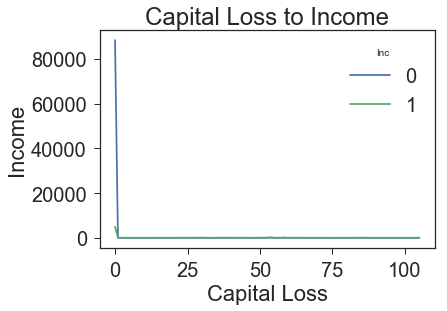

In [89]:
pd.crosstab(df_Data_LE.CanLos,df_Data_LE.Inc).plot()
plt.title('Capital Loss to Income')
plt.xlabel('Capital Loss')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

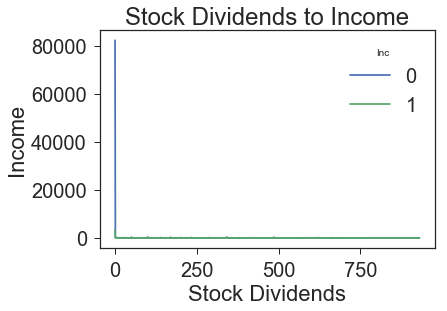

In [90]:
pd.crosstab(df_Data_LE.StkDiv,df_Data_LE.Inc).plot()
plt.title('Stock Dividends to Income')
plt.xlabel('Stock Dividends')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

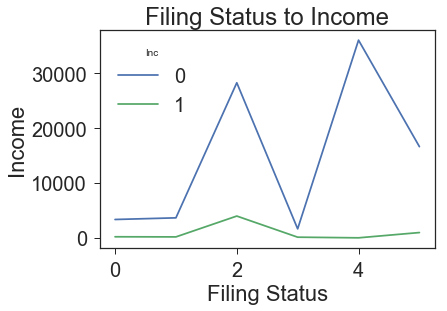

In [91]:
pd.crosstab(df_Data_LE.FilingStat,df_Data_LE.Inc).plot()
plt.title('Filing Status to Income')
plt.xlabel('Filing Status')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

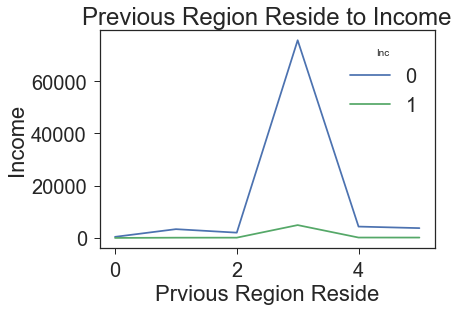

In [92]:
pd.crosstab(df_Data_LE.ResPrvRgn,df_Data_LE.Inc).plot()
plt.title('Previous Region Reside to Income')
plt.xlabel('Prvious Region Reside')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

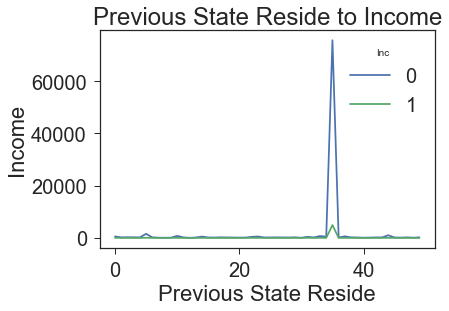

In [93]:
pd.crosstab(df_Data_LE.ResPrvStat,df_Data_LE.Inc).plot()
plt.title('Previous State Reside to Income')
plt.xlabel('Previous State Reside')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

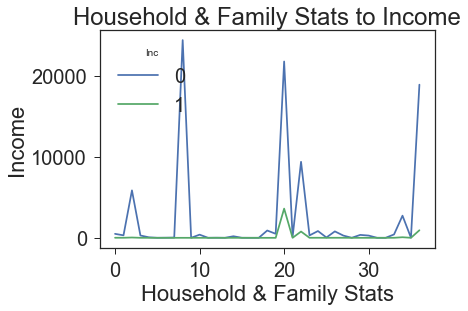

In [94]:
pd.crosstab(df_Data_LE.HshldFamStat,df_Data_LE.Inc).plot()
plt.title('Household & Family Stats to Income')
plt.xlabel('Household & Family Stats')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

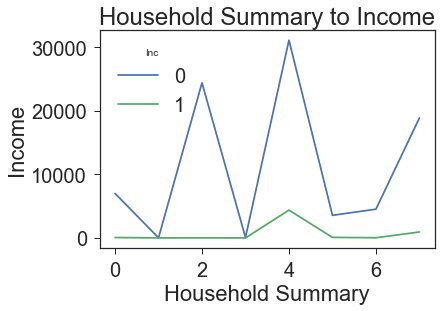

In [95]:
pd.crosstab(df_Data_LE.HshldSum,df_Data_LE.Inc).plot()
plt.title('Household Summary to Income')
plt.xlabel('Household Summary')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

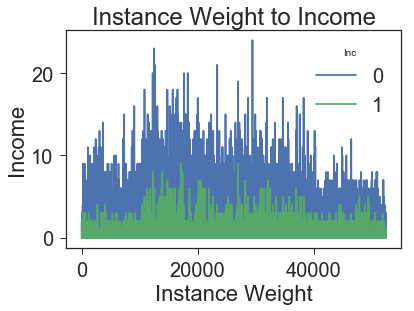

In [96]:
pd.crosstab(df_Data_LE.InstWgt,df_Data_LE.Inc).plot()
plt.title('Instance Weight to Income')
plt.xlabel('Instance Weight')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

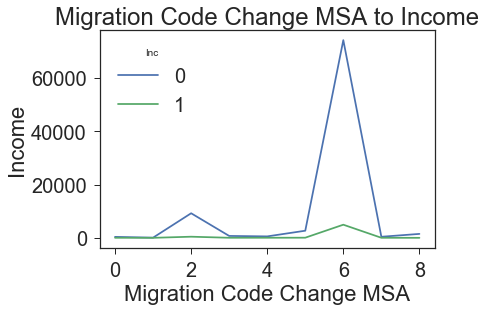

In [97]:
pd.crosstab(df_Data_LE.MigCdMSA,df_Data_LE.Inc).plot()
plt.title('Migration Code Change MSA to Income')
plt.xlabel('Migration Code Change MSA')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

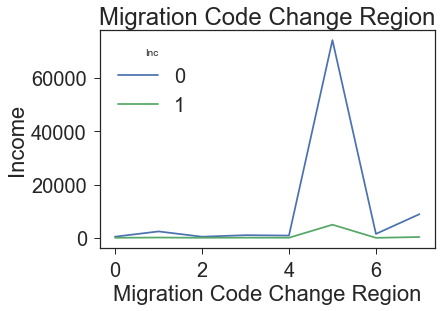

In [98]:
pd.crosstab(df_Data_LE.MigCdRgn,df_Data_LE.Inc).plot()
plt.title('Migration Code Change Region')
plt.xlabel('Migration Code Change Region')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

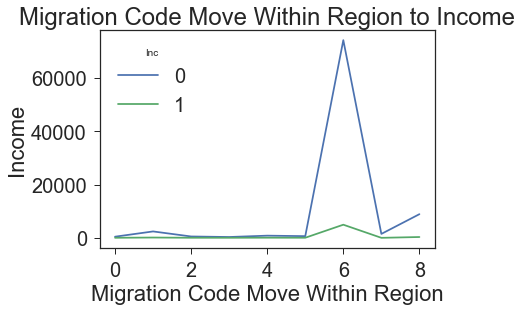

In [99]:
pd.crosstab(df_Data_LE.MigCdRgnMov,df_Data_LE.Inc).plot()
plt.title('Migration Code Move Within Region to Income')
plt.xlabel('Migration Code Move Within Region')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

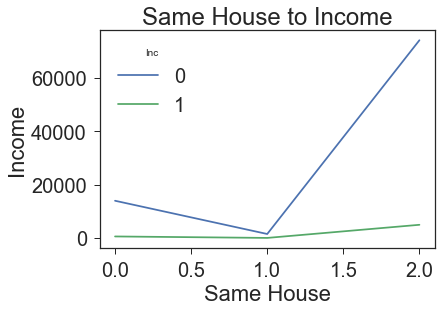

In [100]:
pd.crosstab(df_Data_LE.SameHouse,df_Data_LE.Inc).plot()
plt.title('Same House to Income')
plt.xlabel('Same House')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

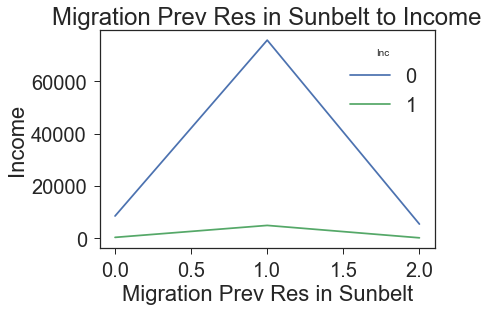

In [101]:
pd.crosstab(df_Data_LE.MigCdSbeltRes,df_Data_LE.Inc).plot()
plt.title('Migration Prev Res in Sunbelt to Income')
plt.xlabel('Migration Prev Res in Sunbelt')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

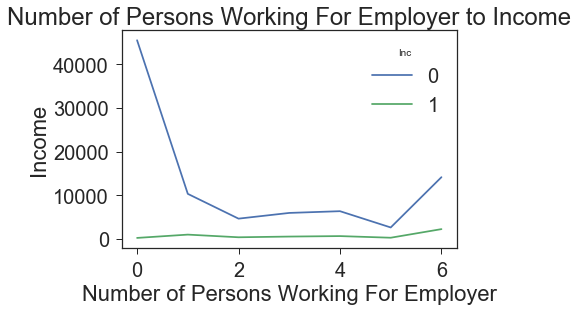

In [102]:
pd.crosstab(df_Data_LE.NumWrkng,df_Data_LE.Inc).plot()
plt.title('Number of Persons Working For Employer to Income')
plt.xlabel('Number of Persons Working For Employer')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

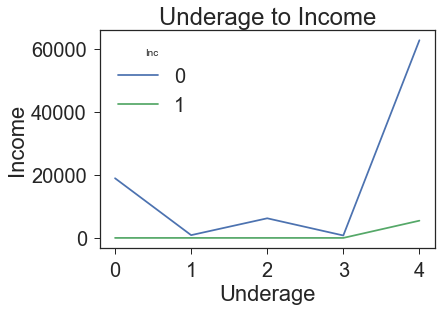

In [103]:
pd.crosstab(df_Data_LE.UnderAge,df_Data_LE.Inc).plot()
plt.title('Underage to Income')
plt.xlabel('Underage')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

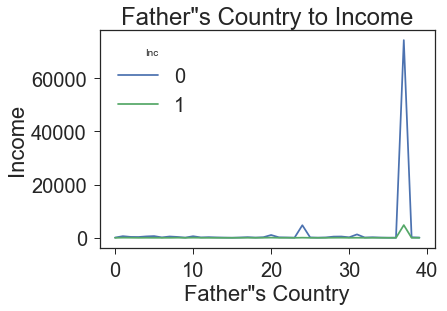

In [104]:
pd.crosstab(df_Data_LE.CntryDad,df_Data_LE.Inc).plot()
plt.title('Father"s Country to Income')
plt.xlabel('Father"s Country')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

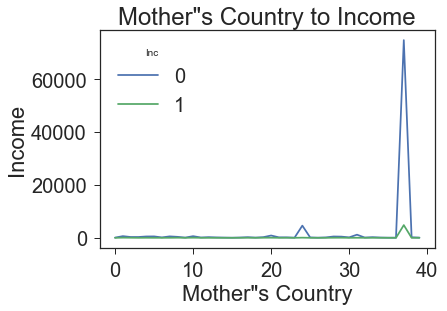

In [105]:
pd.crosstab(df_Data_LE.CntryMom,df_Data_LE.Inc).plot()
plt.title('Mother"s Country to Income')
plt.xlabel('Mother"s Country')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

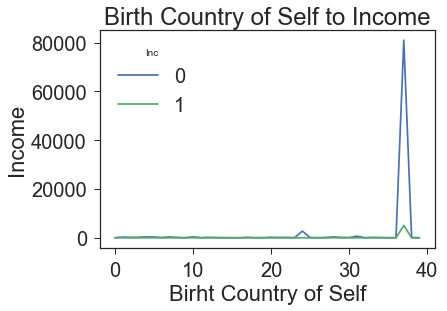

In [106]:
pd.crosstab(df_Data_LE.CntrySelf,df_Data_LE.Inc).plot()
plt.title('Birth Country of Self to Income')
plt.xlabel('Birht Country of Self')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

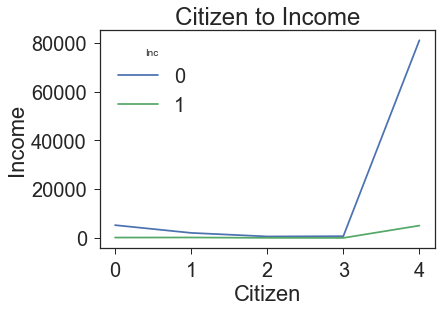

In [107]:
pd.crosstab(df_Data_LE.Citizen,df_Data_LE.Inc).plot()
plt.title('Citizen to Income')
plt.xlabel('Citizen')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

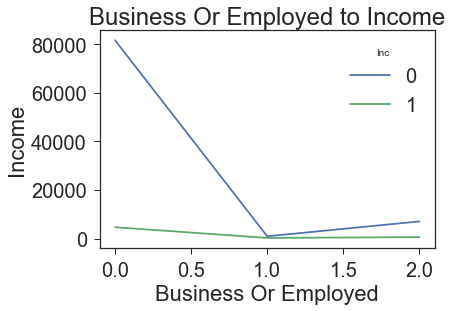

In [108]:
pd.crosstab(df_Data_LE.BusOrEmp,df_Data_LE.Inc).plot()
plt.title('Business Or Employed to Income')
plt.xlabel('Business Or Employed')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

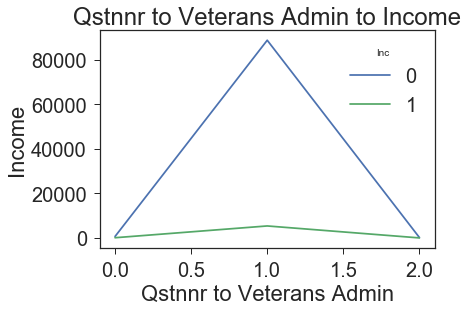

In [109]:
pd.crosstab(df_Data_LE.QstnrVet,df_Data_LE.Inc).plot()
plt.title('Qstnnr to Veterans Admin to Income')
plt.xlabel('Qstnnr to Veterans Admin')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

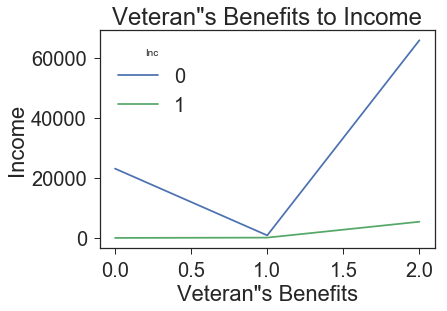

In [110]:
pd.crosstab(df_Data_LE.VetBengts,df_Data_LE.Inc).plot()
plt.title('Veteran"s Benefits to Income')
plt.xlabel('Veteran"s Benefits')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

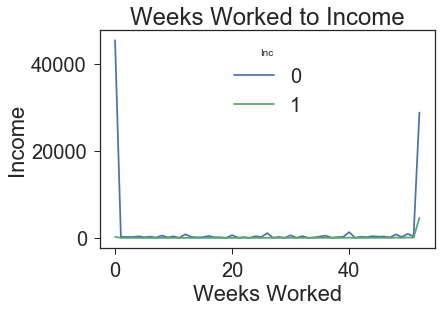

In [111]:
pd.crosstab(df_Data_LE.WksWrkd,df_Data_LE.Inc).plot()
plt.title('Weeks Worked to Income')
plt.xlabel('Weeks Worked')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

Text(0,0.5,'Income')

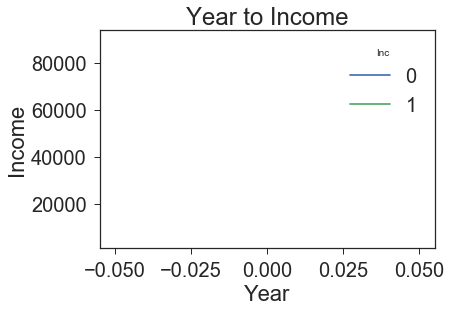

In [112]:
pd.crosstab(df_Data_LE.Year,df_Data_LE.Inc).plot()
plt.title('Year to Income')
plt.xlabel('Year')
plt.ylabel('Income')
# plt.savefig('purchase_fre_job')

In [13]:
# df_FinalData['DistinctLocs'].unique() # Get unique values in any particular column for understanding data
# The result will be an array

In [ ]:
# STARTING MODELING

In [91]:
# Modeling with data using 1's and 0's for nan parametric boolean columns instead of one hot encoding. We'll do the get+dummies below
import pandas as pd
df_AllNumeric = pd.read_csv('FinalData_AllNumeric.csv')
df_AllNumeric.drop(['customerId'],axis=1,inplace=True)
df_AllNumeric.columns

Index(['DistinctItems', 'DistinctLocs', 'NetSpend', 'DistinctCities',
       'DistinctState', 'DaysSinceCustContact', 'dillards_crd',
       't_email_read_Percent', 'Subscribed'],
      dtype='object')

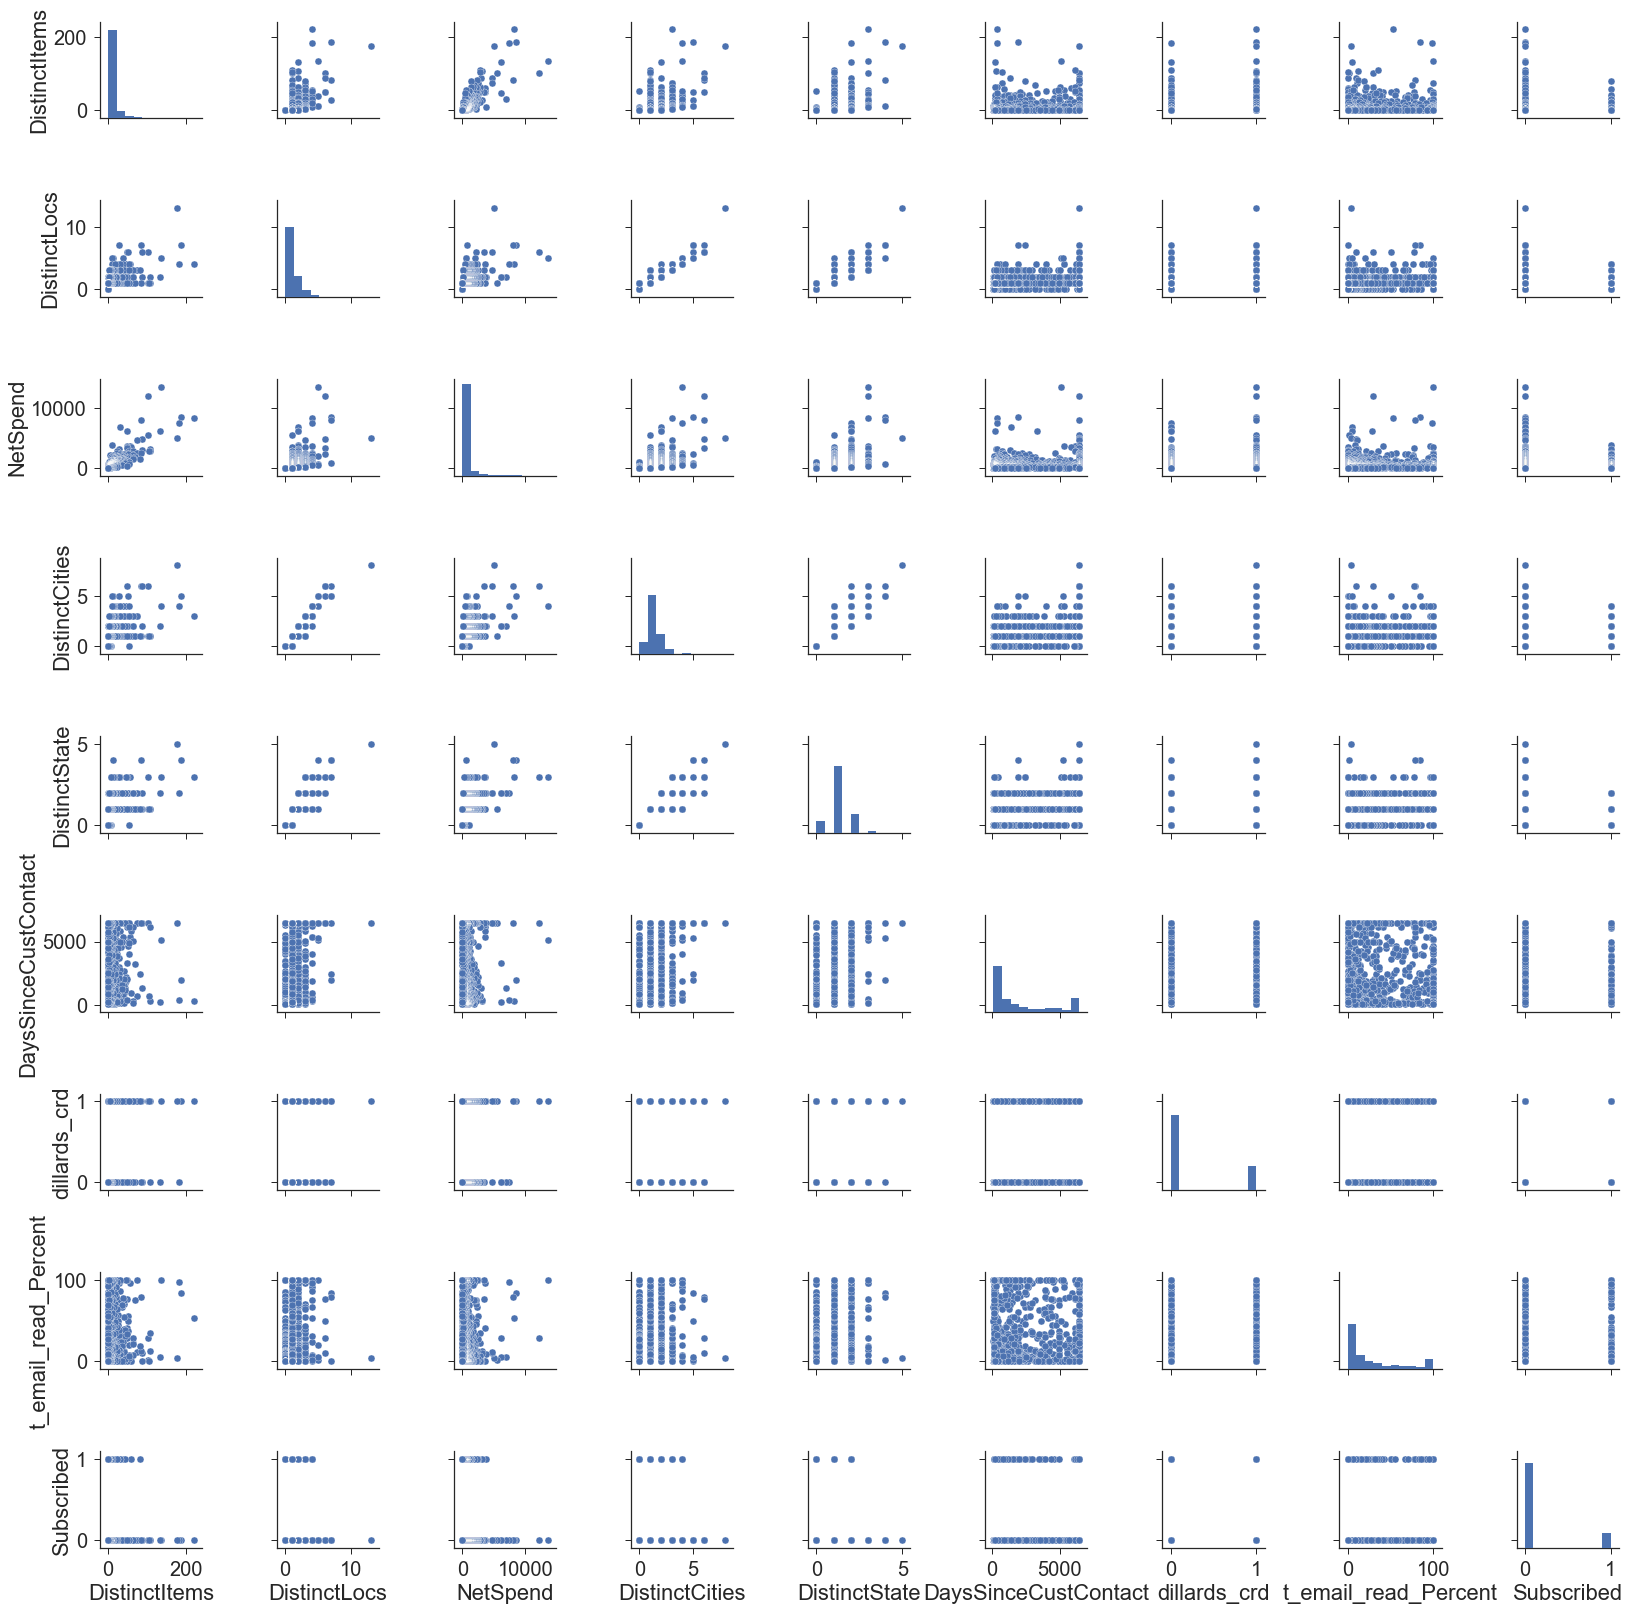

In [92]:
sns.pairplot(df_AllNumeric)

In [93]:
from sklearn.model_selection import train_test_split
X = df_AllNumeric[['DistinctItems', 'DistinctLocs', 'NetSpend',
       'DistinctCities', 'DistinctState', 'DaysSinceCustContact',
       'dillards_crd', 't_email_read_Percent']]
# X = df_AllNumeric[['customerId', 'DistinctItems', 'DistinctLocs', 'NetSpend',
#        'DistinctCities', 'DistinctState', 'DaysSinceCustContact',
#        'dillards_crd', 't_email_read_Percent']]

y = df_AllNumeric['Subscribed']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [94]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

# The p-values for some of the variables are smaller than 0.0. we will remove them.

Optimization terminated successfully.
         Current function value: 0.420895
         Iterations 7
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.007   
Dependent Variable:    Subscribed        AIC:               860.3144
Date:                  2018-10-05 12:05  BIC:               899.6004
No. Observations:      1003              Log-Likelihood:    -422.16 
Df Model:              7                 LL-Null:           -424.93 
Df Residuals:          995               LLR p-value:       0.59367 
Converged:             1.0000            Scale:             1.0000  
No. Iterations:        7.0000                                       
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
DistinctItems        -0.0084   0.0125 -0.6786 0.4974 -0.0329  0.0160
DistinctLocs         -0.0223

In [95]:
# Using Logistic regression without Standard Scaler
from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #Already done above
logregNoSS = LogisticRegression()
logregNoSS.fit(X_train, y_train)
logregNoSS.score(X_test,y_test)

0.8471760797342193

In [96]:
# Using Logistic regression WITH Standard Scaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42) #Already done above
X_train_S = SS.fit_transform(X_train)
X_test_S = SS.transform(X_test)

In [97]:
# Using Logistic regression WITH Standard Scaler
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_S, y_train)
logreg.score(X_test_S,y_test)
# LogReg.predict_proba()

0.8471760797342193

In [98]:
# Using KNN WITH Standard Scaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_S, y_train)
knn.score(X_test_S,y_test)
# LogReg.predict_proba()

0.8205980066445183

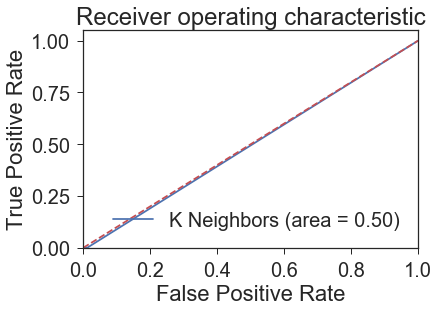

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K Neighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


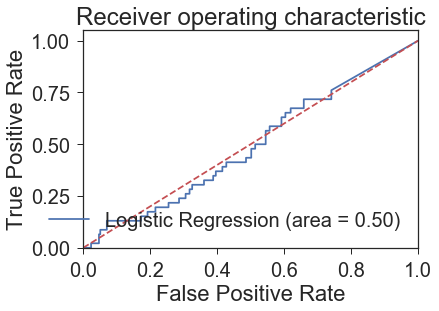

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
y_pred = knn.predict(X_test)
print('Accuracy of K Neighbors classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85
Accuracy of K Neighbors classifier on test set: 0.85


In [28]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# # confusion_matrix
# print(confusion_matrix)

[[  0 255]
 [  0  46]]


In [107]:
from sklearn.metrics import mean_squared_error
import numpy as np

LR_y_pred = logreg.predict(X_test_S)
KNN_y_pred = knn.predict(X_test_S)
# RF_y_pred = RFR.predict(X_test_S)

print('LogReg Train',np.sqrt(mean_squared_error(y_train, logreg.predict(X_train_S))))
print('KNN Train',np.sqrt(mean_squared_error(y_train, knn.predict(X_train_S))))
# print('LR Train',np.sqrt(mean_squared_error(y_train, RFR.predict(X_train_S))))

print('LogReg Test',np.sqrt(mean_squared_error(y_test, LR_y_pred)))
print('KNN Test',np.sqrt(mean_squared_error(y_test, KNN_y_pred)))
# print('LR Train',np.sqrt(mean_squared_error(y_test, RF_y_pred)))

LogReg Train 0.3867462340768809
KNN Train 0.3540566696958629
LogReg Test 0.39092700119815305
KNN Test 0.4235587248015105


In [36]:
# Testing other models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC #SupportVectorClassifier

from sklearn.model_selection import train_test_split


methods = [KNeighborsClassifier, DecisionTreeClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, LinearSVC]

for method in methods:
    instance = method()
    model = instance.fit(X, y)
    print("Method:", method)
    print("Score:", model.score(X, y))
    print("-------------")

Method: <class 'sklearn.neighbors.classification.KNeighborsClassifier'>
Score: 0.8504486540378864
-------------
Method: <class 'sklearn.tree.tree.DecisionTreeClassifier'>
Score: 1.0
-------------
Method: <class 'sklearn.ensemble.bagging.BaggingClassifier'>
Score: 0.9770687936191426
-------------
Method: <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
Score: 0.8484546360917248
-------------
Method: <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
Score: 0.8963110667996012
-------------
Method: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Score: 0.9750747756729811
-------------
Method: <class 'sklearn.svm.classes.LinearSVC'>
Score: 0.15054835493519442
-------------


In [85]:
# Making actual Predictions
df_AllNumericPredict = pd.read_csv('FinalData_AllNumericPredict.csv')
df_AllNumericPredict.head()

,customerId,DistinctItems,DistinctLocs,NetSpend,DistinctCities,DistinctState,DaysSinceCustContact,dillards_crd,t_email_read_Percent,Subscribed
0,115626867,5,1,182.14,1,1,6470,1,27,0
1,115696215,17,1,479.24,1,1,6470,1,2,0
2,115822340,11,1,485.25,1,1,6470,0,100,0
3,115823054,15,1,363.26,1,1,6470,1,58,0
4,115856495,5,1,302.98,1,1,6470,0,0,0


In [86]:
X_Predict = df_AllNumericPredict[[ 'DistinctItems', 'DistinctLocs', 'NetSpend',
       'DistinctCities', 'DistinctState', 'DaysSinceCustContact',
       'dillards_crd', 't_email_read_Percent']]
y_predict = df_AllNumericPredict['Subscribed']

In [57]:
df_Predict = pd.DataFrame()

In [80]:
series_predict = knn.predict(X_Predict)
df_Predict['Subscribe'] = pd.Series(series_predict)

In [77]:
print(knn.predict(X_Predict))
# print(knn.predict_proba(X_Predict))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [78]:
df_Predict['customerId'] = df_AllNumericPredict['customerId']

In [81]:
df_Predict[['customerId', 'Subscribe']].to_csv('submissionAllNumeric.csv', index=False)# you dont need index else it messes up the submission

In [ ]:
#---------------Modeling with one hot encoding

In [114]:
df_with_dummies = pd.get_dummies( df_FinalData, columns = ['dillards_crd'] )
df_with_dummies.head()

,customerId,DistinctItems,DistinctLocs,NetSpend,DistinctCities,DistinctState,DaysSinceCustContact,t_email_read_Percent,Subscribed,dillards_crd_N,dillards_crd_Y
0,220362069,0,0,0.0,0,0,676,100,N,1,0
1,225692457,0,0,0.0,0,0,167,100,N,0,1
2,226360887,0,0,0.0,0,0,99,100,N,1,0
3,165172588,0,0,0.0,0,0,4619,100,Y,0,1
4,219602070,0,0,0.0,0,0,749,100,Y,1,0


In [ ]:
# ---------------OVERSAMPLING TESTING---------------------------

In [71]:
# Implementing SMOTE to counter class imbalance
X = df_AllNumeric.loc[:, df_AllNumeric.columns != 'Y']
y = df_AllNumeric.loc[:, df_AllNumeric.columns == 'Y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(Xgd_train, ygd_train)#(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['Y'])
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ValueError: Shape of passed values is (6, 1194), indices imply (10, 1194)